## Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [3]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\QueryResults.csv',names=['DATE','TAG','POSTS'],header=0)

In [4]:
print(df.head(5))


                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


In [5]:
print(df.tail(5))

                     DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


In [6]:
df.shape

(1991, 3)

In [7]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [8]:
df.groupby('TAG').sum()


C:\Users\DELL\AppData\Local\Temp\ipykernel_936\390715221.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum()


POSTS
TAG                
assembly      34852
c            336042
c#          1423530
c++          684210
delphi        46212
go            47499
java        1696403
javascript  2056510
perl          65286
php         1361988
python      1496210
r            356799
ruby         214582
swift        273055

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
# print(type(df['DATE'][1]))
print(pd.to_datetime(df['DATE'][1]))
type[pd.to_datetime(df['DATE'][1])]

2008-08-01 00:00:00


type[Timestamp('2008-08-01 00:00:00')]

In [10]:
df.DATE=pd.to_datetime(df.DATE)
df.head()

DATE         TAG  POSTS
0 2008-07-01          c#      3
1 2008-08-01    assembly      8
2 2008-08-01  javascript    162
3 2008-08-01           c     85
4 2008-08-01      python    124

In [11]:
reshaped_df=df.pivot(index='DATE',columns='TAG',values='POSTS')
print(reshaped_df.shape)

# print(reshaped_df.groupby)

(145, 14)


In [12]:
print(reshaped_df.head(5))

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   85.0   511.0  164.0    14.0 NaN   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0 NaN  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0 NaN  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0 NaN   958.0       579.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  161.0   124.0  NaN   73.0    NaN  
2008-09-01  131.0  482.0   542.0  6.0  290.0    NaN  
2008-10-01  127.0  617.0   510.0  NaN  249.0    NaN  
2008-11-01   97.0  504.0   452.0  1.0  160.0    NaN  


In [13]:
print(reshaped_df.tail(5))

TAG         assembly       c       c#     c++  delphi     go     java  \
DATE                                                                    
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

TAG         javascript   perl     php   python       r   ruby   swift  
DATE                                                                   
2020-03-01     20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01     24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01     25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01     23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01     23802.0  182.0  7334.0  31261.0  5694.0  

In [14]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [15]:
reshaped_df.fillna(0,inplace=True)

## Data Visualisaton with with Matplotlib


 Using the [matplotlib] to plot a single programming language (e.g., java) on a chart.

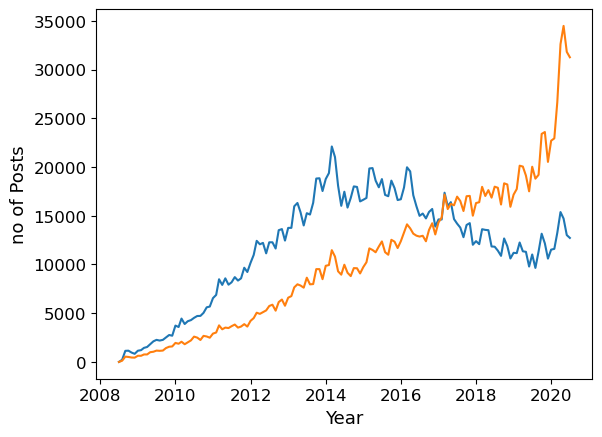

In [16]:
plt.plot(reshaped_df.index,reshaped_df.java,reshaped_df.python)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year',fontsize=13)
plt.ylabel('no of Posts',fontsize=13)

plt.show()

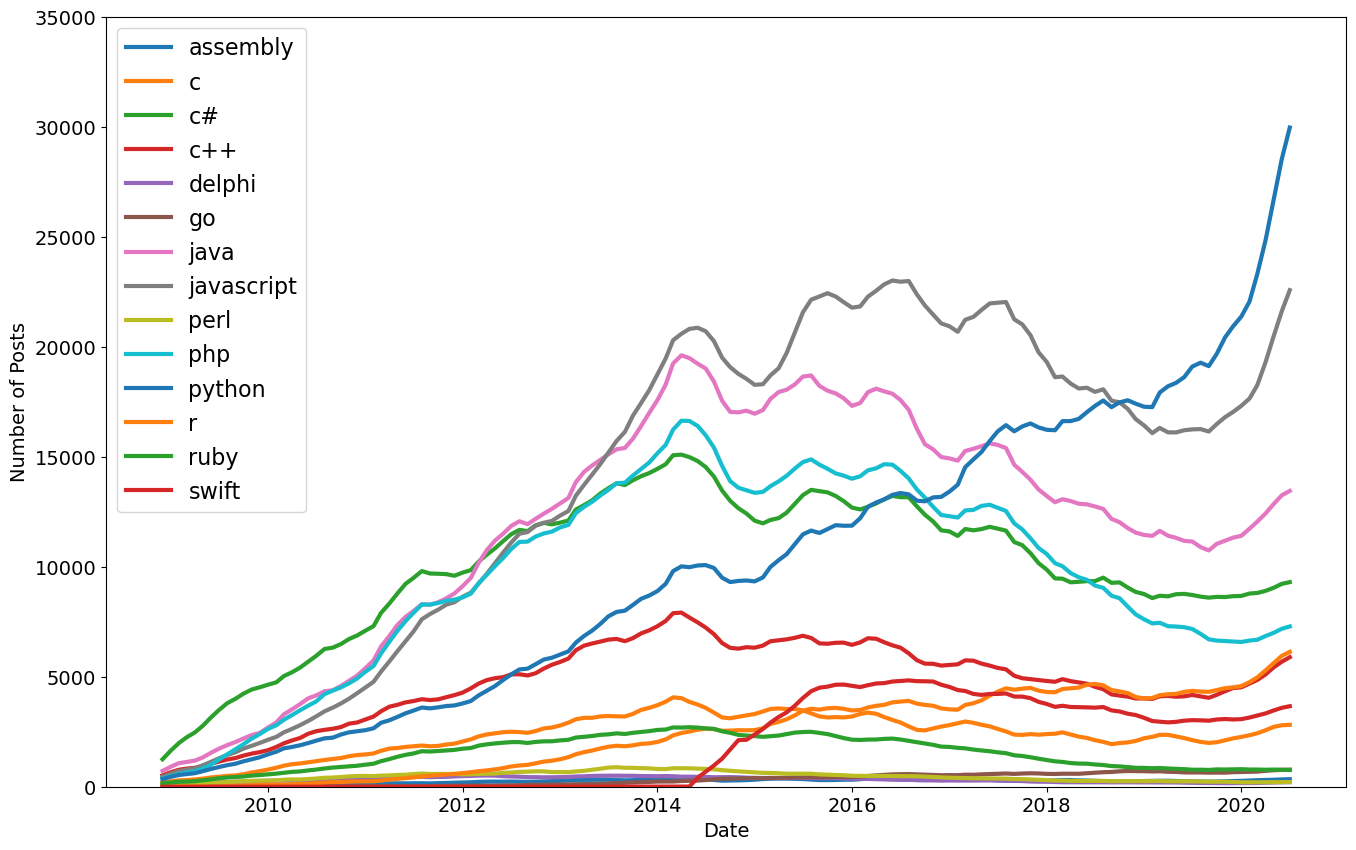

In [17]:
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)